<a href="https://colab.research.google.com/github/dharmendra-chouhan/-DEAS-Accounts---Municipal-Corporation/blob/master/TimeSheet_01_06_2020_to_13_06_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title  {display-mode: "form"}
import pandas as pd

import Data bugzilla

In [2]:
#@title  {display-mode: "form"}
from google.colab import files
uploaded = files.upload()

Saving bugs-2020-06-16.csv to bugs-2020-06-16.csv


In [3]:
#@title  {display-mode: "form"}
bugzilla_1junto13jun= pd.read_csv('bugs-2020-06-16.csv', encoding='latin-1')

In [4]:
bugzilla_1junto13jun.head(2)

,Bug ID,Product,Component,Assignee,Orig. Est.,Status,Resolution,Summary,Changed,Deadline,Actual Hours,Start Date,Patch Release Version (Defect Closure-For Developers ),Patch Release Version (Defect Open- For Testers),Project Name
0,33115,KCCA,Document Management System,adaundkar51@gmail.com,2.0,VERIFIED,TESTING CLOSED,"In Routing History form, When (Non-Actionable)...",2019-09-18 15:37:01,2019-08-22,0.0,2019-08-22,V 2.09,V 2.06,NaN
1,33181,KCCA,Document Management System,adaundkar51@gmail.com,1.0,VERIFIED,TESTING CLOSED,DMS>>Report>>Logical Folder Structure Report>>...,2019-09-17 16:05:45,2019-08-30,0.0,2019-08-30,V 2.09,---,NaN


import Data clockify

In [6]:
#@title  {display-mode: "form"}
from google.colab import files
uploaded = files.upload()

Saving Clockify_Detailed_Report_06_01_2020-06_13_2020.csv to Clockify_Detailed_Report_06_01_2020-06_13_2020.csv


In [7]:
#@title  {display-mode: "form"}
clockify_1junto13jun= pd.read_csv('Clockify_Detailed_Report_06_01_2020-06_13_2020.csv', encoding='latin-1')

**Clockify and Bugzilla Merging Data**

In [8]:
#@title  {display-mode: "form"}
scriteria = bugzilla_1junto13jun['Bug ID'].values.tolist()  
df=pd.DataFrame(clockify_1junto13jun)
clockifybugs = df[0:0]
clockify_1junto13jun['Bug ID'] =0
for x in scriteria:
  df=pd.DataFrame(clockify_1junto13jun[clockify_1junto13jun['Description'].str.upper().str.contains(str(x))])
  df['Bug ID'] =x
  clockifybugs=clockifybugs.append(df)
clockifybugs = pd.merge(clockifybugs, bugzilla_1junto13jun, on='Bug ID')
clockifybugsmer=clockifybugs[['Bug ID','Product', 'User','Assignee','Description','Summary','Orig. Est.','Duration (decimal)','Status','Resolution','Actual Hours','Start Date_x','End Date']] 
clockifybugsmer


,Bug ID,Product,User,Assignee,Description,Summary,Orig. Est.,Duration (decimal),Status,Resolution,Actual Hours,Start Date_x,End Date
0,29255.0,KCCA,Priyesh Panvalkar,adaundkar51@gmail.com,"Bug 29255 - After pre and post payment , In po...","In Scrutiny Report, Department Name,Designatio...",1.0,1.00,VERIFIED,TESTING CLOSED,1.0,06/01/2020,06/01/2020
1,34764.0,Aksentech_Payroll,Deepraj Singh Panwar,afak.pangarkar@gmail.com,Bug 34764 - User Log - Login and Logout Captur...,User Log - Login and Logout Capturing the Even...,18.0,1.80,RESOLVED,FIXED ON DEVELOPMENT,0.0,06/08/2020,06/08/2020
2,34764.0,Aksentech_Payroll,Deepraj Singh Panwar,afak.pangarkar@gmail.com,Bug 34764 - User Log - Login and Logout Captur...,User Log - Login and Logout Capturing the Even...,18.0,4.83,RESOLVED,FIXED ON DEVELOPMENT,0.0,06/08/2020,06/08/2020
3,34764.0,Aksentech_Payroll,Deepraj Singh Panwar,afak.pangarkar@gmail.com,Bug 34764 - User Log - Login and Logout Captur...,User Log - Login and Logout Capturing the Even...,18.0,0.86,RESOLVED,FIXED ON DEVELOPMENT,0.0,06/05/2020,06/05/2020
4,34764.0,Aksentech_Payroll,Deepraj Singh Panwar,afak.pangarkar@gmail.com,Bug 34764 - User Log - Login and Logout Captur...,User Log - Login and Logout Capturing the Even...,18.0,0.77,RESOLVED,FIXED ON DEVELOPMENT,0.0,06/04/2020,06/04/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,34648.0,Aksentech_Payroll,santhosh,santhoshkodurijava@gmail.com,"34648 client Master and project detail Add,Ed...","Client Master and Project detail Add , Edit an...",32.0,8.50,RESOLVED,FIXED ON DEVELOPMENT,0.0,06/05/2020,06/05/2020
344,34648.0,Aksentech_Payroll,santhosh,santhoshkodurijava@gmail.com,"34648 client Master and project detail Add,Ed...","Client Master and Project detail Add , Edit an...",32.0,10.50,RESOLVED,FIXED ON DEVELOPMENT,0.0,06/04/2020,06/04/2020
345,34648.0,Aksentech_Payroll,santhosh,santhoshkodurijava@gmail.com,"34648 client Master and project detail Add,Ed...","Client Master and Project detail Add , Edit an...",32.0,9.50,RESOLVED,FIXED ON DEVELOPMENT,0.0,06/03/2020,06/03/2020
346,34648.0,Aksentech_Payroll,santhosh,santhoshkodurijava@gmail.com,"34648 client Master and project detail Add,Ed...","Client Master and Project detail Add , Edit an...",32.0,9.50,RESOLVED,FIXED ON DEVELOPMENT,0.0,06/02/2020,06/02/2020


Date and User wise Bugzilla and Clockify Orig Est.,Actual and Clockify Hours sum

In [9]:
#@title  {display-mode: "form"}
import numpy as np
from math import modf
# ,'Start Date_x','End Date'
grouped=clockifybugsmer.groupby(['Start Date_x','End Date','User','Orig. Est.','Actual Hours','Bug ID'])
grop_bud_sum=grouped['Duration (decimal)'].agg([np.sum])
pd.set_option('display.max_rows', grop_bud_sum.shape[0]+1)

print(grop_bud_sum)

                                                                                sum
Start Date_x End Date   User                 Orig. Est. Actual Hours Bug ID        
06/01/2020   06/01/2020 Chiranjib Pattanayak 0.0        0.00         34724.0   2.00
                                                                     34725.0   2.50
                                                                     34729.0   1.67
                                                                     34731.0   2.33
                        Dharmendra Chouhan   3.5        2.50         34769.0   2.50
                                             16.0       6.50         34765.0   6.50
                        Dikshita Soneria     6.0        6.00         34768.0   3.15
                                             8.0        8.00         34143.0   3.90
                        Manoj Sawan          24.0       26.00        34749.0   9.25
                        Priyanka Mankare     6.0        6.00         34768.0

In [ ]:
#@title  {display-mode: "form"}
import numpy as np
from math import modf
# ,'Start Date_x','End Date'
grouped=clockifybugsmer.groupby(['User','Orig. Est.','Actual Hours','Bug ID'])
grop_bud_sum=grouped['Duration (decimal)'].agg([np.sum])
pd.set_option('display.max_rows', grop_bud_sum.shape[0]+1)

print(grop_bud_sum)

                                                         sum
User                 Orig. Est. Actual Hours Bug ID         
Afak Pangarkar       0.0        0.00         34795.0    1.33
                     4.0        3.00         34805.0    0.50
                                4.00         34796.0    0.58
                     18.0       18.00        34810.0    0.42
                     24.0       0.00         34819.0    0.33
Ashok Parmar         0.0        0.00         34806.0   27.08
Bhushan Raole        0.0        0.00         34795.0    0.29
                     2.0        2.00         34792.0    0.18
                                             34793.0    0.18
                     3.0        3.00         34776.0    0.48
                     4.0        4.00         34796.0    0.24
                     8.0        8.00         34767.0    0.48
Chiranjib Pattanayak 0.0        0.00         34724.0    2.00
                                             34725.0    2.50
                        

Bug count wise user data

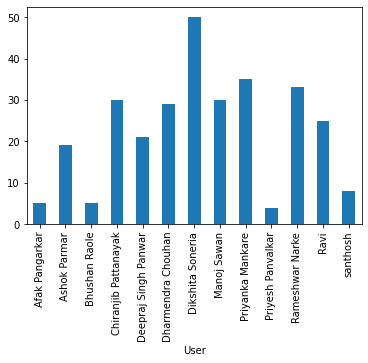

In [12]:
#@title  {display-mode: "form"}
import matplotlib.pyplot as plt
import pandas as pd
clockifybugsmer.groupby('User')['Duration (decimal)'].nunique().plot(kind='bar')
plt.show()

**User wise and bug wise total hours**

In [13]:
print(clockifybugsmer.groupby('User')['Duration (decimal)'].sum())

User
Afak Pangarkar            3.16
Ashok Parmar             27.08
Bhushan Raole             1.85
Chiranjib Pattanayak    100.34
Deepraj Singh Panwar     55.38
Dharmendra Chouhan       53.56
Dikshita Soneria         84.03
Manoj Sawan             108.87
Priyanka Mankare         31.82
Priyesh Panvalkar         3.00
Rameshwar Narke          65.63
Ravi                     84.41
santhosh                104.72
Name: Duration (decimal), dtype: float64


**clockify wise sum**

In [14]:
print(clockify_1junto13jun.groupby('User')['Duration (decimal)'].sum())

User
Afak Pangarkar           98.55
Ashok Parmar             82.08
Bhushan Raole            83.03
Chiranjib Pattanayak    117.38
Deepraj Singh Panwar     87.64
Dharmendra Chouhan       98.71
Dikshita Soneria         90.09
Kaaustubh                87.76
Manoj Sawan             119.95
Mihir Shah               95.62
Prashant Chavan          92.48
Priti Bhosale            92.06
Priyanka Mankare         96.86
Priyesh Panvalkar        90.50
Raghunandan Rao         109.97
Rameshwar Narke          92.56
Ravi                     90.14
Ruchita Puri             94.17
Rupesh                   86.09
Shrikant kulkarni        43.95
Swarup Haldankar         88.39
Tejasvi Sawant           87.23
UDAY                     90.38
santhosh                104.72
vilas jadhav             97.95
zaid khan                96.15
Name: Duration (decimal), dtype: float64


In [35]:
#@title  {display-mode: "form"}
clobugwisemerge=pd.merge(bugwiseclokifysum, clockifysum, how='outer', on='User')
clobugwisemerge['inclockifybug_wisehr'] = clobugwisemerge['inclockifybug_wisehr'].fillna(0)
clobugwisemerge

,User,inclockifybug_wisehr,inclockify_wisehr
0,Afak Pangarkar,3.16,98.55
1,Ashok Parmar,27.08,82.08
2,Bhushan Raole,1.85,83.03
3,Chiranjib Pattanayak,100.34,117.38
4,Deepraj Singh Panwar,55.38,87.64
5,Dharmendra Chouhan,53.56,98.71
6,Dikshita Soneria,84.03,90.09
7,Manoj Sawan,108.87,119.95
8,Priyanka Mankare,31.82,96.86
9,Priyesh Panvalkar,3.00,90.50


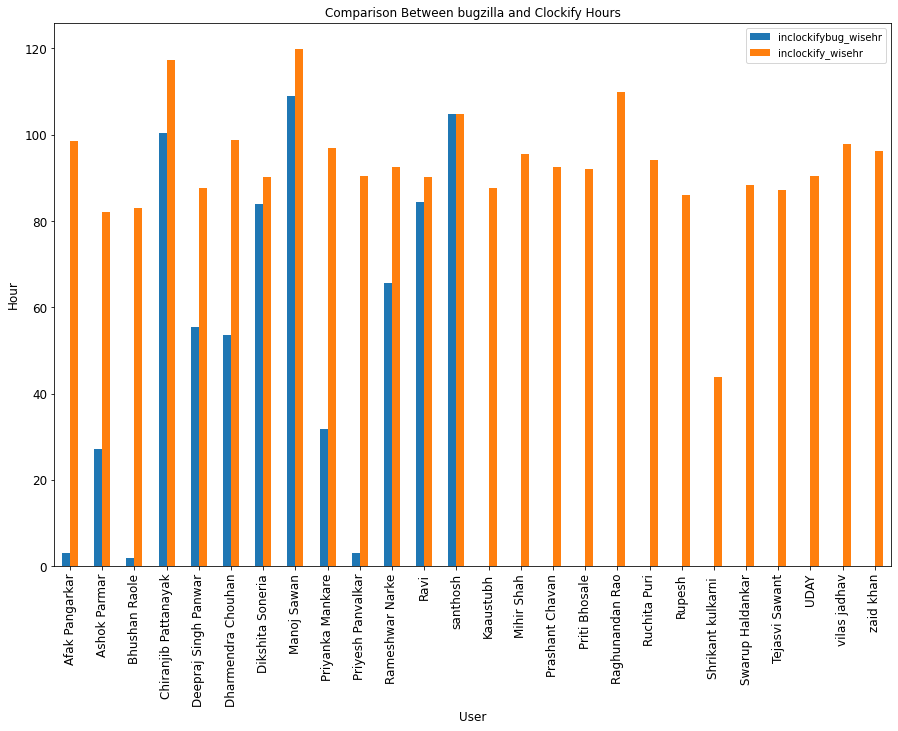

In [56]:
#@title  {display-mode: "form"}
import matplotlib.pyplot as plt
df1 = clobugwisemerge.set_index('User')
ax = df1[['inclockifybug_wisehr','inclockify_wisehr']].plot(kind='bar', title ="Comparison Between bugzilla and Clockify Hours", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("User", fontsize=12)
ax.set_ylabel("Hour", fontsize=12)
plt.show()

